In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('data/manual_predictions.parquet')
comments_df =pd.read_parquet('data/comments.parquet')
df = df.merge(
        comments_df[['id', 'comment_length', 'pros_length_proportion', 'comment_length_group', 'pros_length_proportion_group']],
        on='id',
        how='inner'
    )

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            348 non-null    object        
 1   rating                        348 non-null    int64         
 2   prediction_time               348 non-null    float64       
 3   ts_prediction                 107 non-null    datetime64[ns]
 4   comment_length                348 non-null    int64         
 5   pros_length_proportion        348 non-null    int64         
 6   comment_length_group          348 non-null    int64         
 7   pros_length_proportion_group  348 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 21.9+ KB


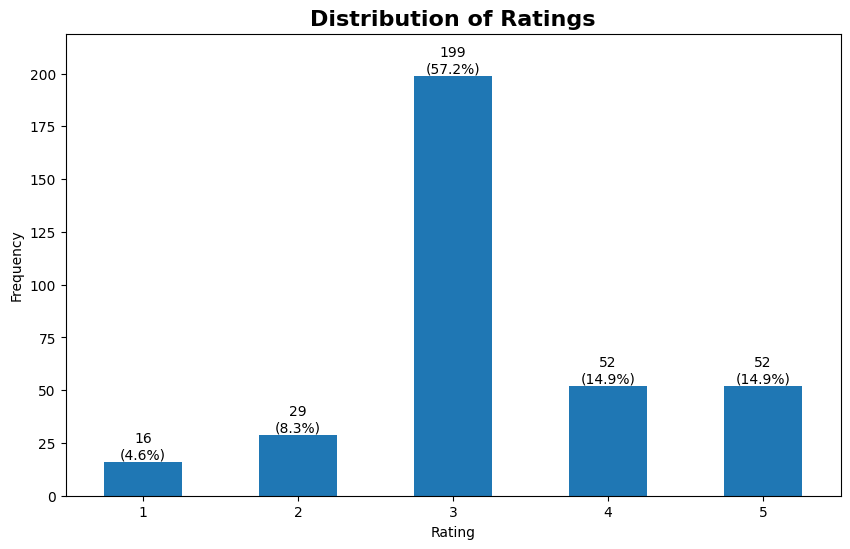

In [11]:
rating_counts = df['rating'].value_counts().sort_index()
total = rating_counts.sum()

plt.figure(figsize=(10, 6),)
ax = rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
ax.set_ylim(0, rating_counts.max() * 1.1)

for i, count in enumerate(rating_counts):
    percentage = (count / total) * 100
    ax.text(i, count, f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

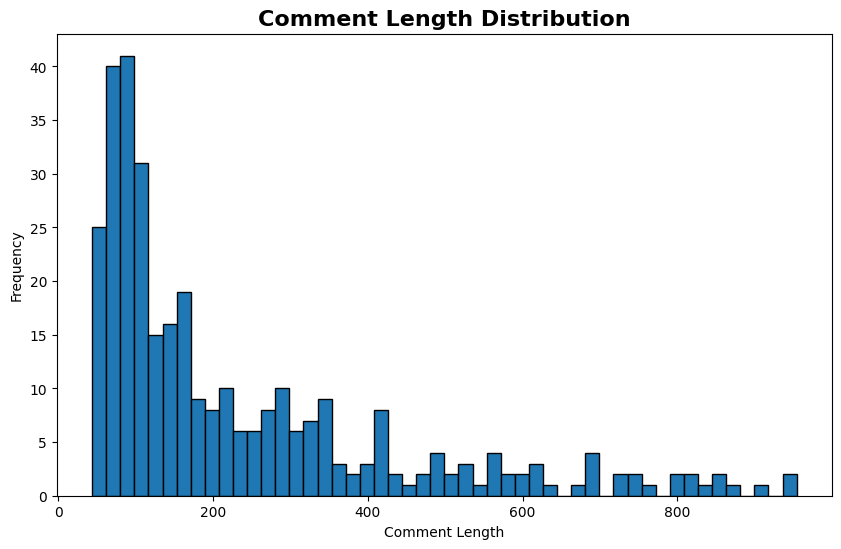

In [12]:
max_length = df['comment_length'].quantile(0.95)
filtered = df[df['comment_length'] <= max_length]

plt.figure(figsize=(10,6))
plt.hist(filtered['comment_length'], bins=50, edgecolor='black')
plt.title('Comment Length Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

In [13]:
percentiles = df['comment_length'].quantile([0.2, 0.4, 0.6, 0.8]).reset_index()
percentiles.columns = ['Percentile', 'Comment Length']
display(percentiles)


,Percentile,Comment Length
0,0.2,84.0
1,0.4,120.8
2,0.6,220.4
3,0.8,421.0


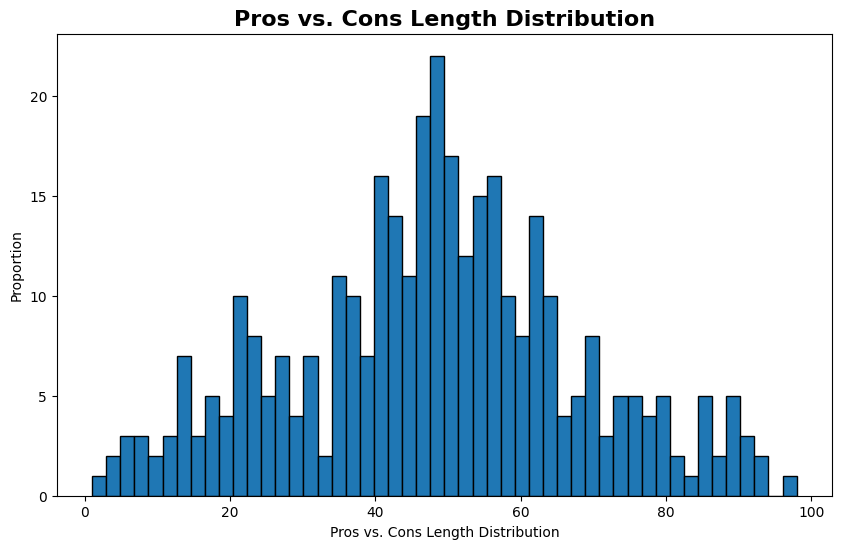

In [14]:
plt.figure(figsize=(10,6))
plt.hist(df['pros_length_proportion'], bins=50, edgecolor='black')
plt.title('Pros vs. Cons Length Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Pros vs. Cons Length Distribution')
plt.ylabel('Proportion')
plt.show()

In [15]:
percentiles = df['pros_length_proportion'].quantile([0.2, 0.4, 0.6, 0.8]).reset_index()
percentiles.columns = ['Percentile', 'Pros vs. Cons Length Distribution']
display(percentiles)


,Percentile,Pros vs. Cons Length Distribution
0,0.2,31.0
1,0.4,44.0
2,0.6,53.0
3,0.8,63.6


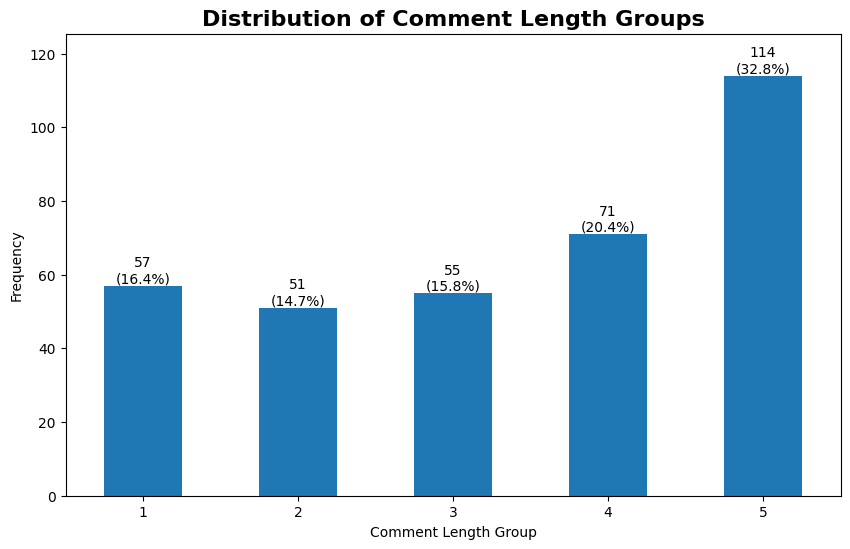

In [16]:
rating_counts = df['comment_length_group'].value_counts().sort_index()
total = rating_counts.sum()

plt.figure(figsize=(10, 6),)
ax = rating_counts.plot(kind='bar')
plt.xlabel('Comment Length Group')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Length Groups', fontsize=16, fontweight='bold')
ax.set_ylim(0, rating_counts.max() * 1.1)

for i, count in enumerate(rating_counts):
    percentage = (count / total) * 100
    ax.text(i, count, f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

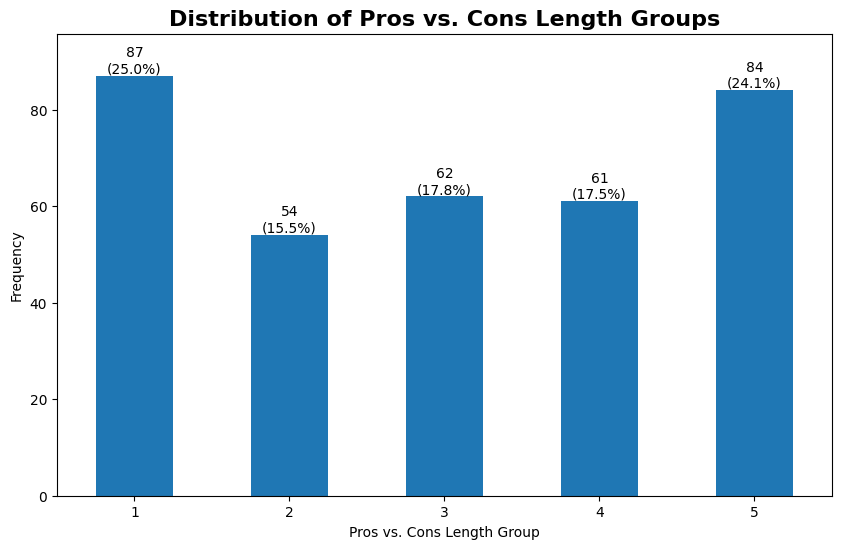

In [17]:
rating_counts = df['pros_length_proportion_group'].value_counts().sort_index()
total = rating_counts.sum()

plt.figure(figsize=(10, 6),)
ax = rating_counts.plot(kind='bar')
plt.xlabel('Pros vs. Cons Length Group')
plt.ylabel('Frequency')
plt.title('Distribution of Pros vs. Cons Length Groups', fontsize=16, fontweight='bold')
ax.set_ylim(0, rating_counts.max() * 1.1)

for i, count in enumerate(rating_counts):
    percentage = (count / total) * 100
    ax.text(i, count, f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [18]:
cross_tab = pd.crosstab(df['comment_length_group'], df['pros_length_proportion_group'])
print(cross_tab)

pros_length_proportion_group   1   2   3   4   5
comment_length_group                            
1                              0   9  26  18   4
2                              2  11  12  11  15
3                              9  17  10  14   5
4                             28   6   6   9  22
5                             48  11   8   9  38


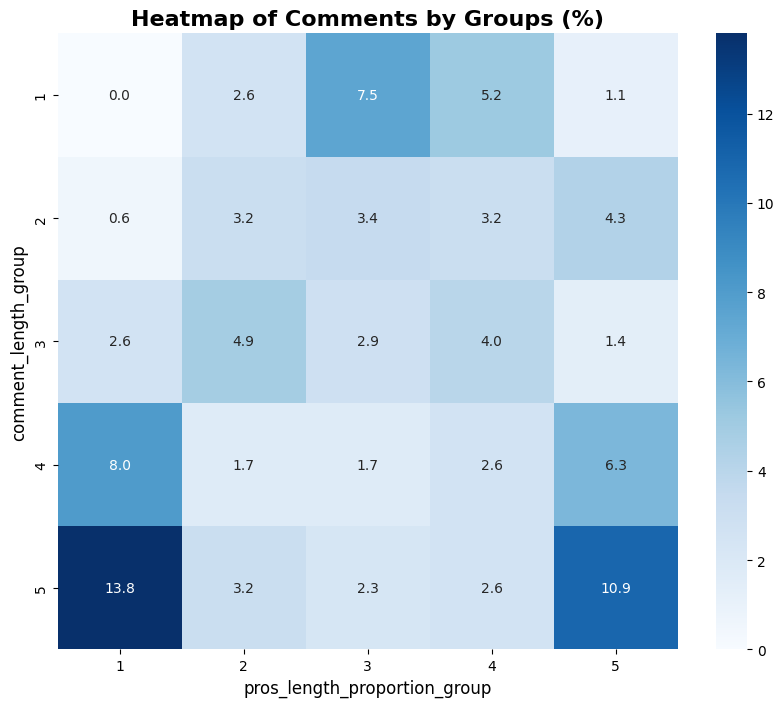

In [19]:
cross_tab = pd.crosstab(df['comment_length_group'], df['pros_length_proportion_group'])

# Calcula o total de comentários e converte as contagens em porcentagens
total_comments = cross_tab.values.sum()
cross_tab_percent = (cross_tab / total_comments) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_percent, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap of Comments by Groups (%)", fontsize=16, fontweight="bold")
plt.xlabel("pros_length_proportion_group", fontsize=12)
plt.ylabel("comment_length_group", fontsize=12)
plt.show()

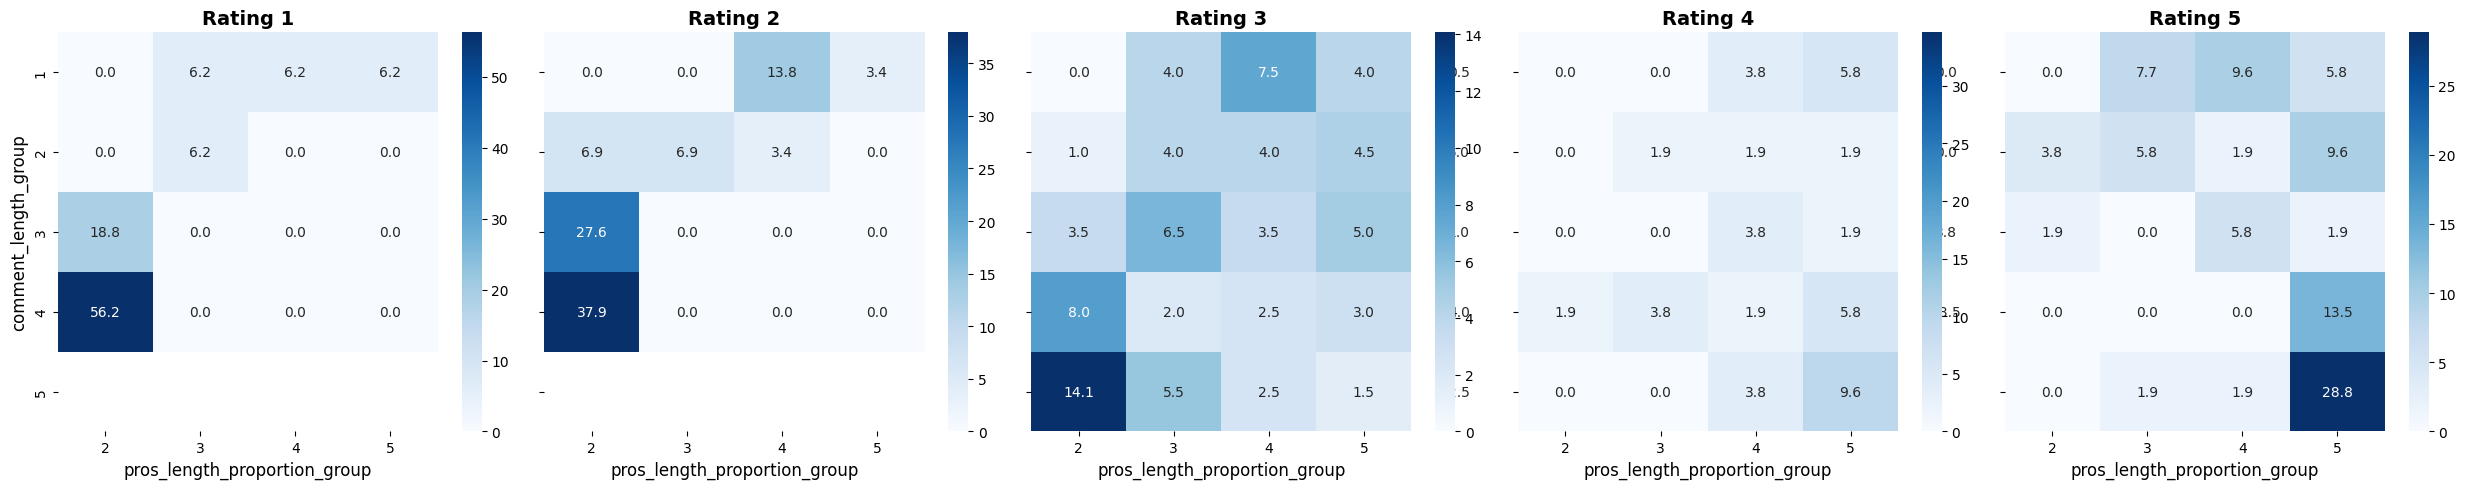

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharex=True, sharey=True)

for rating in range(1, 6):
    # Filtra o DataFrame para o rating atual
    df_filtered = df[df['rating'] == rating]
    
    # Cria uma tabela cruzada com as contagens
    cross_tab = pd.crosstab(df_filtered['comment_length_group'], df_filtered['pros_length_proportion_group'])
    
    # Calcula o total de comentários para o rating filtrado
    total_comments = cross_tab.values.sum()
    
    # Converte as contagens em porcentagens (se houver comentários)
    if total_comments > 0:
        cross_tab_percent = (cross_tab / total_comments) * 100
    else:
        cross_tab_percent = cross_tab.copy()
    
    # Gera o heatmap no subplot correspondente
    sns.heatmap(cross_tab_percent, annot=True, fmt=".1f", cmap="Blues", ax=axes[rating-1])
    axes[rating-1].set_title(f'Rating {rating}', fontsize=14, fontweight='bold')
    axes[rating-1].set_xlabel("pros_length_proportion_group", fontsize=12)
    if rating == 1:
        axes[rating-1].set_ylabel("comment_length_group", fontsize=12)
    else:
        axes[rating-1].set_ylabel("")

plt.tight_layout()